### Zadanie 1

Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

Zdefiniujemy sobie funkcję, która na reprezentacji bitowej wyszczególni nam znak, cechę oraz mantysę.

In [1]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

Wywołamy teraz naszą funkcję dla tych trzech reprezentacji.

In [2]:
decode(Float16(1/3)), issubnormal(Float16(1/3))

(('0', "01101", "0101010101"), false)

In [3]:
decode(Float32(1/3)), issubnormal(Float32(1/3))

(('0', "01111101", "01010101010101010101011"), false)

In [4]:
decode(Float64(1/3)), issubnormal(Float64(1/3))

(('0', "01111111101", "0101010101010101010101010101010101010101010101010101"), false)

Teraz stworzymy reprezentację 1/3 na Float16, scastujemy na Float64 i sprawdzimy rezultat wywołania naszej funkcji.

In [5]:
x = Float16(1/3)
decode(Float64(x)), issubnormal(Float64(x))

(('0', "01111111101", "0101010101000000000000000000000000000000000000000000"), false)

Jak możemy zauważyć, znak oczywiście jest ten sam, cecha jest taka sama, natomiast po pewnym indeksie nie zgadzają się
cyfry mantysy - występuje ciąg zer. Wynika to z faktu, że reprezentacja Float16 jest mniej dokładna i dokonując
konwersji na Float64 nie bierzemy już dokładnie liczby 1/3 jako argumentu, tylko przybliżenie tej liczby przez
Float16.

### Zadanie 2

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze za pomocą języka Julia. Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu od 1.0 do 1000000.0.


Krótki przykład, co ile reprezentowane dokładnie są liczby zmiennoprzecinkowe:

In [6]:
a=Float32(1.0)
for i=1:20
    a=nextfloat(a)
    print(a)
    print("\n")
end

1.0000001
1.0000002
1.0000004
1.0000005
1.0000006
1.0000007
1.0000008
1.000001
1.0000011
1.0000012
1.0000013
1.0000014
1.0000015
1.0000017
1.0000018
1.0000019
1.000002
1.0000021
1.0000023
1.0000024


Jak widzimy, narysowanie dokładnie wykresu zależności odległości od wartości dla przedziału od 1.0 do 1000000.0
wymagałoby użycia superkomputera ze zwględu na ilość danych (głównie chodzi o wizualizacje wykresu, a nie samo liczenie
różnic), dlatego obliczymy odległość dla floatów co pewną wartość, obecnie ustalono step = 100, co daje wizualizację
wykresu co 1-2s po uruchomieniu.

_(Zauważyłem ciekawą rzecz, mianowicie przy step=1 wykres oczywiście nie ładuje się, natomiast zużycie procesora i
pamięci nie przekracza 30%, chętnie dowiedziałbym się, czy da się przydzielić więcej zasobów, żeby szybciej wykonać taki wykres)_

In [7]:
a = Float32(1.0)
values = Float32[]
diffs = Float32[]
for i = 1.0:100:1000000.0
    prev = prevfloat(i)
    diff = i - prev
    push!(values, i)
    push!(diffs, diff)
end

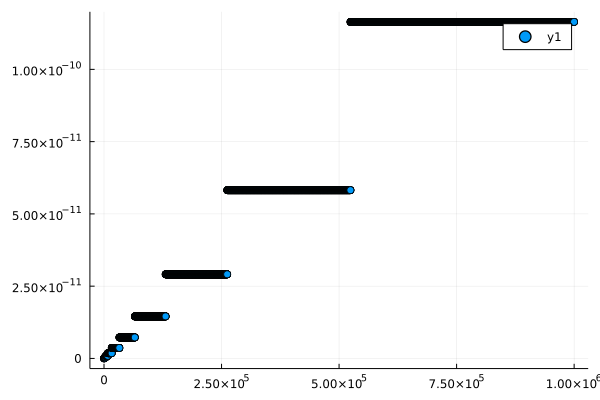

In [8]:
using Plots
scatter(values, diffs)

Jak widzimy, mamy do czynienia ze skokową zmianą dokładności reprezentacji, skoki te są coraz dłuższe w dwóch znaczeniach (zarówno coraz więcej wartości ma tę samą dokładność przy zwiększaniu wartości liczby, jak i różnice dokładności pomiędzy kolejnymi skokami są coraz większe).

### Zadanie 3

Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest GSL (język C). Korzystając ze wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C (link). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).


```c
#include <stdio.h>
#include "gsl/gsl_ieee_utils.h"
#include "float.h"

// gcc main.c -lgslcblas -lgsl -lm
// ./a.out

int main() {
    double x = 1.0;
    while (x > 0) {
        printf("%.*e ", DECIMAL_DIG, x);
        gsl_ieee_printf_double(&x);
        printf("\n");
        x /= 2;
    }
    return 0;
}

```

Wywołanie tego programu skutkuje wypisaniem na konsolę m.in. poniższych linii:

<p style="font-size:30px">...</p>

1.424047269444608885178e-306  1.0000000000000000000000000000000000000000000000000000*2^-1016

7.120236347223044425889e-307  1.0000000000000000000000000000000000000000000000000000*2^-1017

3.560118173611522212944e-307  1.0000000000000000000000000000000000000000000000000000*2^-1018

1.780059086805761106472e-307  1.0000000000000000000000000000000000000000000000000000*2^-1019

8.900295434028805532361e-308  1.0000000000000000000000000000000000000000000000000000*2^-1020

4.450147717014402766180e-308  1.0000000000000000000000000000000000000000000000000000*2^-1021

2.225073858507201383090e-308  1.0000000000000000000000000000000000000000000000000000*2^-1022

1.112536929253600691545e-308  0.1000000000000000000000000000000000000000000000000000*2^-1022

5.562684646268003457726e-309  0.0100000000000000000000000000000000000000000000000000*2^-1022

2.781342323134001728863e-309  0.0010000000000000000000000000000000000000000000000000*2^-1022

1.390671161567000864431e-309  0.0001000000000000000000000000000000000000000000000000*2^-1022

6.953355807835004322157e-310  0.0000100000000000000000000000000000000000000000000000*2^-1022

3.476677903917502161078e-310  0.0000010000000000000000000000000000000000000000000000*2^-1022

1.738338951958751080539e-310  0.0000001000000000000000000000000000000000000000000000*2^-1022

8.691694759793755402696e-311  0.0000000100000000000000000000000000000000000000000000*2^-1022

4.345847379896877701348e-311  0.0000000010000000000000000000000000000000000000000000*2^-1022

2.172923689948438850674e-311  0.0000000001000000000000000000000000000000000000000000*2^-1022

1.086461844974219425337e-311  0.0000000000100000000000000000000000000000000000000000*2^-1022

5.432309224871097126685e-312  0.0000000000010000000000000000000000000000000000000000*2^-1022

2.716154612435548563343e-312  0.0000000000001000000000000000000000000000000000000000*2^-1022

1.358077306217774281671e-312  0.0000000000000100000000000000000000000000000000000000*2^-1022

6.790386531088871408356e-313  0.0000000000000010000000000000000000000000000000000000*2^-1022

3.395193265544435704178e-313  0.0000000000000001000000000000000000000000000000000000*2^-1022

1.697596632772217852089e-313  0.0000000000000000100000000000000000000000000000000000*2^-1022

8.487983163861089260446e-314  0.0000000000000000010000000000000000000000000000000000*2^-1022

4.243991581930544630223e-314  0.0000000000000000001000000000000000000000000000000000*2^-1022

2.121995790965272315111e-314  0.0000000000000000000100000000000000000000000000000000*2^-1022

1.060997895482636157556e-314  0.0000000000000000000010000000000000000000000000000000*2^-1022

5.304989477413180787778e-315  0.0000000000000000000001000000000000000000000000000000*2^-1022
<p style="font-size:30px">...</p>

Wszystkie liczby powyżej miały postać znormalizowaną, tutaj pokazano, początek reprezentacji zdenormalizowanej.
Jak widzimy, największą liczbą zdenormalizowaną jest 1.112536929253600691545e-308.

Liczba przestaje być znormalizowana, gdy jest zbyt mała, ponieważ im mniejsza jest, tym więcej bitów trzeba przeznaczyć na reprezentację cechy, a przy stałej ilości bitów na reprezentację nie można zwiększać w nieskończoność, stąd pojawia się denormalizacja.

### Zadanie 4

Na przykładzie wybranego algorytmu niestabilnego numerycznie:

* Pokazać, że działa źle.
* Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
* Zademonstować wersję stabilną.


### Obliczanie e do wybranej potęgi
Znamy poniższy algorytm obliczania:
$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ... $$

Wszystko jest w porządku, dopóki x > 0. Natomiast wywołajmy ten algorytm dla liczby ujemnej, np. *x = -5*.

In [9]:
 x = Float32(-5)
e_x = Float32(0)
for i=0:20
    e_x += (x ^ i) / factorial(i)
    print((x ^ i) / factorial(i))
    print("\n")
end 
e_x

1.0
-5.0
12.5
-20.833334
26.041666
-26.041666
21.70139
-15.500992
9.68812
-5.382289
2.6911445
-1.2232474
0.50968647
-0.19603324
0.07001188
-0.02333729
0.0072929035
-0.0021449716
0.0005958255
-0.00015679617
3.9199043e-5


0.0067455135f0

Nie komentując jeszcze niczego, zmieńmy teraz strategię. Dobrze wiemy, że:

$$e^{-x} = \frac{1}{e^x} = \frac{1}{1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...}$$

Wykonajmy teraz w ten sposób ten algorytm.

In [10]:
x = Float32(5)
e_x = Float32(0)
for i=0:20
    e_x += (x ^ i) / factorial(i)
    print((x ^ i) / factorial(i))
    print("\n")
end
e_x = 1 / e_x

1.0
5.0
12.5
20.833334
26.041666
26.041666
21.70139
15.500992
9.68812
5.382289
2.6911445
1.2232474
0.50968647
0.19603324
0.07001188
0.02333729
0.0072929035
0.0021449716
0.0005958255
0.00015679617
3.9199043e-5


0.006737947f0

Korzystając z Wolframa i popełniając _argumentum ad wolframa (Wolfram ma zawsze rację)_ sprawdźmy, ile wynosi dokładna wartość:

$$ e^{-5} = 0.0067379469990854670966360484231484242488495850273550854303055315 $$

Jak widzimy, drugie podejście dało nam dużo lepszy wynik.

Niestabilność pierwszego algorytmu polega na _catastrophic cancellation_. Na przemian dodajemy i odejmujemy liczby, przy czym bezpośrednią przyczyną niestabilności jest właśnie to drugie działanie - odejmując bliskie sobie liczby, tworzymy liczbę, która na dużej ilości bitów ma zera, a na których pierwotnie obydwie tamte liczby miały miejsca znaczące. Dodatkowo przez to, że liczba jest mała, przesuwamy mantysę "w lewo", a nie mamy informacji, co wpisać w nowe bity mantysy "z prawej strony".

Przy drugim podejściu nie ma tego problemu, ponieważ ciągle dodajemy. Drugie podejście jest algorytmem stabilnym.